# CONTADO CON LIQUI
#### It is an operation by which a person or a company can exchange Argentine pesos for dollars abroad, through the purchase and sale of shares or debt securities.

In [5]:
pip install yfinance # Import API Yahoo Finace

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 939 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# Stock reference: 
# Grupo Financiero Galicia (GGAL) / Buenos Aires Stock (GGAL.BA) / Ratio 10:1
# YPF Sociedad Anónima (YPF) / Buenos Aires Stock (YPFD.BA) / Ratio 1:1
# SPDR S&P 500 (SPY)  / Buenos Aires Stock (SPY.BA) / Ratio 20:1
acciones = [ 
    ('GGAL', 'GGAL.BA', 10),
    ('YPF', 'YPFD.BA', 1),
    ('SPY', 'SPY.BA', 20),
]
adrs = pd.DataFrame() 
locales = pd.DataFrame() 
ccls = pd.DataFrame() 

In [16]:
for accion in acciones:
    adrs[accion[0]]=yf.download(accion[0], period='1d' , interval='2m')['Adj Close']
    locales[accion[1]]=yf.download(accion[1], period='1d' , interval='2m')['Adj Close']
    ccls[accion[0]]=locales[accion[1]] * accion[2] / adrs[accion[0]]
    ccls[accion[0]].interpolate(method='linear',inplace=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [17]:
print(ccls.tail())

                                 GGAL         YPF         SPY
Datetime                                                     
2022-09-20 14:04:00+00:00  297.579753  307.770794  305.863669
2022-09-20 14:06:00+00:00  297.579753  307.770794  305.863669
2022-09-20 14:10:00+00:00  297.579753  307.770794  305.863669
2022-09-20 14:12:00+00:00  297.579753  307.770794  305.863669
2022-09-20 14:13:46+00:00  297.579753  307.770794  305.863669


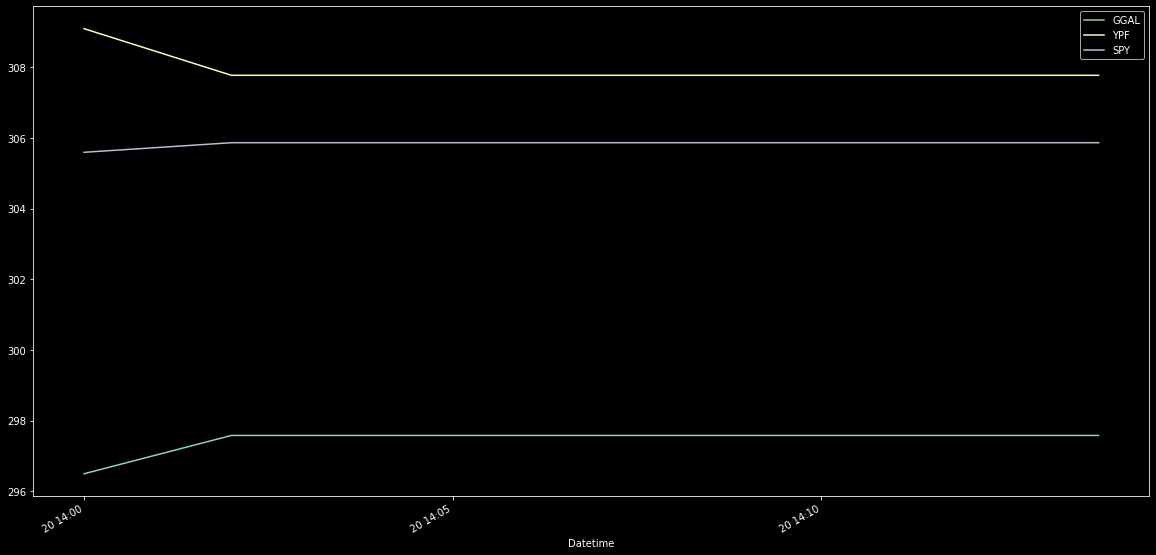

In [19]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = [20, 10]
ccls.plot()
plt.show()